<a href="https://colab.research.google.com/github/EeshanNair4207/Exploratory-Data-Analysis-of-New-York-Schools/blob/main/eda_ny_schools_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/2020-2021 School Quality Reports - High School.csv'
data = pd.read_csv(file_path)
print(data.head())

      dbn                                        school_name  school_type  \
0  01M292                         Orchard Collegiate Academy  High School   
1  01M448                University Neighborhood High School  High School   
2  01M450                         East Side Community School  High School   
3  01M539  New Explorations into Science, Technology and ...  High School   
4  01M696                     Bard High School Early College  High School   

   enrollment survey_pp_RI survey_pp_CT survey_pp_SE survey_pp_ES  \
0         296         0.76         0.84         0.83         0.89   
1         570         0.82         0.95         0.92         0.97   
2         377         0.85         0.91         0.91         0.95   
3         664         0.78         0.86          0.8         0.88   
4         636         0.85          0.8         0.83         0.84   

  survey_pp_SF survey_pp_TR  ... n_pct_cpci_other_college_all  \
0         0.91         0.91  ...                         

In [3]:
columns_of_interest = [
    'dbn', 'school_name', 'enrollment', 'survey_pp_RI', 'val_pct_degree_reg_4yr_all',
    'val_pct_degree_reg_6yr_all', 'val_pct_cpci_other_college_all',
    'n_pct_degree_reg_4yr_all', 'n_pct_degree_reg_6yr_all',
    'survey_pp_SF', 'survey_pp_CT'
]
subset_data = data[columns_of_interest]
print(subset_data.head())


      dbn                                        school_name  enrollment  \
0  01M292                         Orchard Collegiate Academy         296   
1  01M448                University Neighborhood High School         570   
2  01M450                         East Side Community School         377   
3  01M539  New Explorations into Science, Technology and ...         664   
4  01M696                     Bard High School Early College         636   

  survey_pp_RI val_pct_degree_reg_4yr_all val_pct_degree_reg_6yr_all  \
0         0.76                      0.938                      0.786   
1         0.82                      0.985                      0.838   
2         0.85                      0.924                      0.947   
3         0.78                       0.97                      0.979   
4         0.85                       0.95                      0.993   

  val_pct_cpci_other_college_all n_pct_degree_reg_4yr_all  \
0                          0.031                 

In [5]:
# Identify relevant columns
columns_of_interest = [
    'dbn',  # School identifier
    'school_name',  # Name of the school
    'enrollment',  # Total number of students enrolled
    'survey_pp_RI',  # School satisfaction survey score
    'val_pct_degree_reg_4yr_all',  # % students earning a regular degree in 4 years
    'val_pct_degree_reg_6yr_all',  # % students earning a regular degree in 6 years
    'val_pct_cpci_other_college_all',  # % attending other colleges
    'n_pct_degree_reg_4yr_all',  # Number of students earning a regular degree in 4 years
    'n_pct_degree_reg_6yr_all',  # Number of students earning a regular degree in 6 years
    'survey_pp_SF',  # School facilities score
    'survey_pp_CT',  # Teacher quality score
]

# Create a subset of the dataset
subset_data = data[columns_of_interest]

# Check for missing values
print(subset_data.isnull().sum())

# Display the first few rows of the subset
print(subset_data.head())


dbn                               0
school_name                       0
enrollment                        0
survey_pp_RI                      0
val_pct_degree_reg_4yr_all        0
val_pct_degree_reg_6yr_all        0
val_pct_cpci_other_college_all    0
n_pct_degree_reg_4yr_all          0
n_pct_degree_reg_6yr_all          0
survey_pp_SF                      0
survey_pp_CT                      0
dtype: int64
      dbn                                        school_name  enrollment  \
0  01M292                         Orchard Collegiate Academy         296   
1  01M448                University Neighborhood High School         570   
2  01M450                         East Side Community School         377   
3  01M539  New Explorations into Science, Technology and ...         664   
4  01M696                     Bard High School Early College         636   

  survey_pp_RI val_pct_degree_reg_4yr_all val_pct_degree_reg_6yr_all  \
0         0.76                      0.938                     

In [6]:
# Generate descriptive statistics for numeric columns
desc_stats = subset_data.describe()
print(desc_stats)

        enrollment
count   487.000000
mean    606.761807
std     721.655037
min      22.000000
25%     318.000000
50%     398.000000
75%     512.000000
max    5917.000000


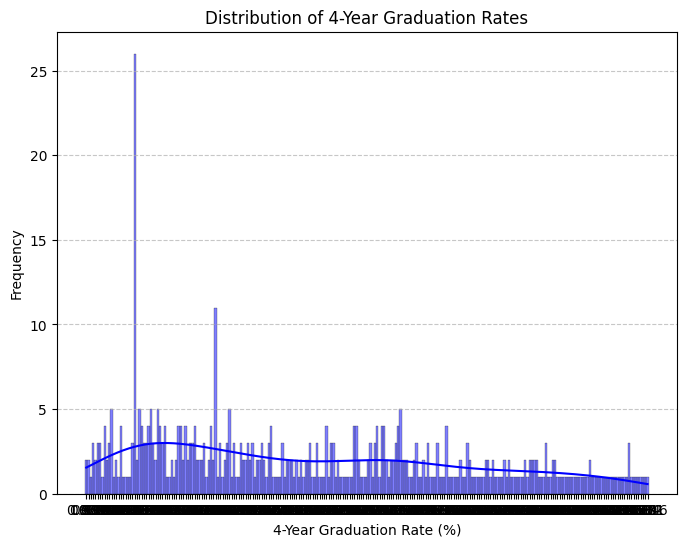

In [7]:
# Plot the distribution of 4-Year Graduation Rates
plt.figure(figsize=(8, 6))
sns.histplot(subset_data['val_pct_degree_reg_4yr_all'], bins=20, kde=True, color='blue')
plt.title('Distribution of 4-Year Graduation Rates')
plt.xlabel('4-Year Graduation Rate (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

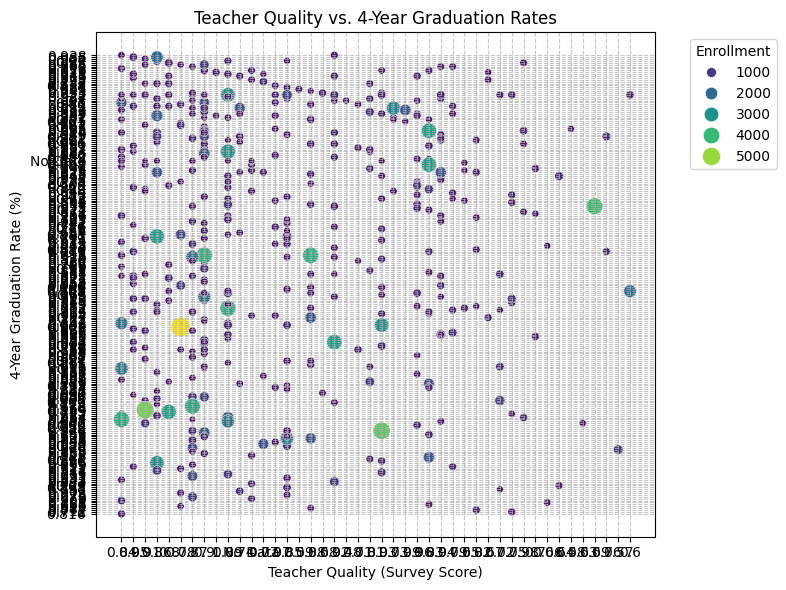

In [8]:
# Plot Teacher Quality vs. 4-Year Graduation Rates
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=subset_data,
    x='survey_pp_CT',
    y='val_pct_degree_reg_4yr_all',
    hue='enrollment',
    size='enrollment',
    sizes=(20, 200),
    palette='viridis'
)
plt.title('Teacher Quality vs. 4-Year Graduation Rates')
plt.xlabel('Teacher Quality (Survey Score)')
plt.ylabel('4-Year Graduation Rate (%)')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Enrollment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


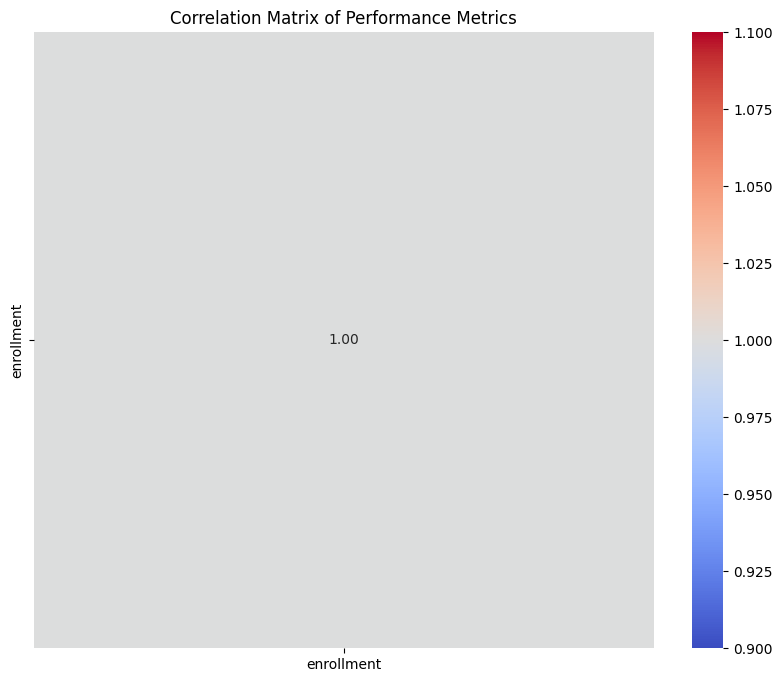

In [9]:
# Calculate and visualize correlation matrix for numeric columns
numeric_cols = subset_data.select_dtypes(include=['float64', 'int64']).columns
correlation = subset_data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()

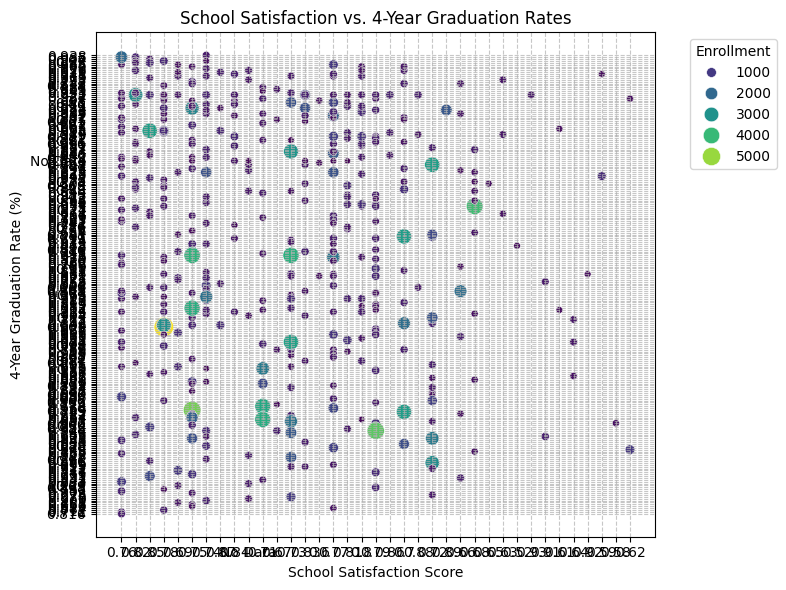

In [10]:
# Example: Attendance data can be added if present in the dataset.
# Scatter plot for Attendance Rate vs. Graduation Rate
# Adjust the column names accordingly if you have attendance metrics.
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=subset_data,
    x='survey_pp_RI',  # Replace this with attendance metric if available
    y='val_pct_degree_reg_4yr_all',
    hue='enrollment',
    size='enrollment',
    sizes=(20, 200),
    palette='viridis'
)
plt.title('School Satisfaction vs. 4-Year Graduation Rates')
plt.xlabel('School Satisfaction Score')
plt.ylabel('4-Year Graduation Rate (%)')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Enrollment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
